In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.13.1


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [6]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [7]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [8]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [10]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
#train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 11s 716us/sample - loss: 0.6925 - acc: 0.5852 - val_loss: 0.6915 - val_acc: 0.5837
Epoch 2/40
15000/15000 [==============================] - 4s 285us/sample - loss: 0.6892 - acc: 0.6674 - val_loss: 0.6862 - val_acc: 0.7162
Epoch 3/40
15000/15000 [==============================] - 4s 290us/sample - loss: 0.6793 - acc: 0.7343 - val_loss: 0.6725 - val_acc: 0.7394
Epoch 4/40
15000/15000 [==============================] - 5s 326us/sample - loss: 0.6601 - acc: 0.7535 - val_loss: 0.6498 - val_acc: 0.7423
Epoch 5/40
15000/15000 [==============================] - 5s 311us/sample - loss: 0.6302 - acc: 0.7793 - val_loss: 0.6178 - val_acc: 0.7672
Epoch 6/40
15000/15000 [==============================] - 5s 335us/sample - loss: 0.5911 - acc: 0.8002 - val_loss: 0.5793 - val_acc: 0.7946
Epoch 7/40
15000/15000 [==============================] - 5s 

In [12]:
#evaluate model
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 2s 95us/sample - loss: 0.3221 - acc: 0.8735
[0.32207578671455384, 0.87352]


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

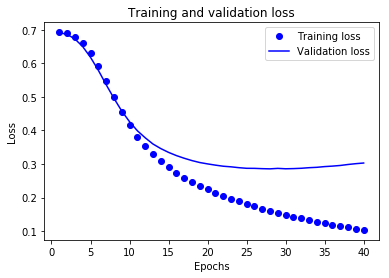

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

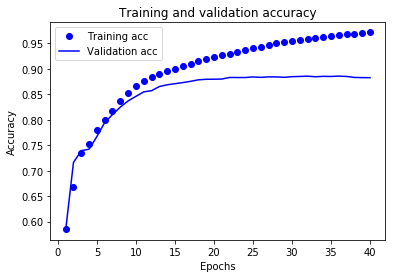

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
#reducing overfitting
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [18]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.4969 - acc: 0.7915 - binary_crossentropy: 0.4969 - val_loss: 0.3501 - val_acc: 0.8732 - val_binary_crossentropy: 0.3501
Epoch 2/20
 - 10s - loss: 0.2600 - acc: 0.9104 - binary_crossentropy: 0.2600 - val_loss: 0.2887 - val_acc: 0.8880 - val_binary_crossentropy: 0.2887
Epoch 3/20
 - 9s - loss: 0.1886 - acc: 0.9356 - binary_crossentropy: 0.1886 - val_loss: 0.2885 - val_acc: 0.8834 - val_binary_crossentropy: 0.2885
Epoch 4/20
 - 10s - loss: 0.1498 - acc: 0.9500 - binary_crossentropy: 0.1498 - val_loss: 0.3143 - val_acc: 0.8755 - val_binary_crossentropy: 0.3143
Epoch 5/20
 - 10s - loss: 0.1213 - acc: 0.9616 - binary_crossentropy: 0.1213 - val_loss: 0.3280 - val_acc: 0.8750 - val_binary_crossentropy: 0.3280
Epoch 6/20
 - 10s - loss: 0.0979 - acc: 0.9718 - binary_crossentropy: 0.0979 - val_loss: 0.3550 - val_acc: 0.8722 - val_binary_crossentropy: 0.3550
Epoch 7/20
 - 10s - loss: 0.0790 - acc: 0.9788 - binary_crossen

In [20]:
#smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [21]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.5809 - acc: 0.7416 - binary_crossentropy: 0.5809 - val_loss: 0.4640 - val_acc: 0.8406 - val_binary_crossentropy: 0.4640
Epoch 2/20
 - 10s - loss: 0.3675 - acc: 0.8844 - binary_crossentropy: 0.3675 - val_loss: 0.3491 - val_acc: 0.8756 - val_binary_crossentropy: 0.3491
Epoch 3/20
 - 9s - loss: 0.2745 - acc: 0.9093 - binary_crossentropy: 0.2745 - val_loss: 0.3084 - val_acc: 0.8822 - val_binary_crossentropy: 0.3084
Epoch 4/20
 - 9s - loss: 0.2264 - acc: 0.9246 - binary_crossentropy: 0.2264 - val_loss: 0.2903 - val_acc: 0.8851 - val_binary_crossentropy: 0.2903
Epoch 5/20
 - 9s - loss: 0.1950 - acc: 0.9350 - binary_crossentropy: 0.1950 - val_loss: 0.2844 - val_acc: 0.8872 - val_binary_crossentropy: 0.2844
Epoch 6/20
 - 8s - loss: 0.1727 - acc: 0.9431 - binary_crossentropy: 0.1727 - val_loss: 0.2850 - val_acc: 0.8859 - val_binary_crossentropy: 0.2850
Epoch 7/20
 - 9s - loss: 0.1543 - acc: 0.9499 - binary_crossentrop

In [22]:
#bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [23]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 40s - loss: 0.3481 - acc: 0.8483 - binary_crossentropy: 0.3481 - val_loss: 0.3026 - val_acc: 0.8755 - val_binary_crossentropy: 0.3026
Epoch 2/20
 - 31s - loss: 0.1476 - acc: 0.9468 - binary_crossentropy: 0.1476 - val_loss: 0.3295 - val_acc: 0.8728 - val_binary_crossentropy: 0.3295
Epoch 3/20
 - 26s - loss: 0.0479 - acc: 0.9854 - binary_crossentropy: 0.0479 - val_loss: 0.4496 - val_acc: 0.8667 - val_binary_crossentropy: 0.4496
Epoch 4/20
 - 26s - loss: 0.0073 - acc: 0.9988 - binary_crossentropy: 0.0073 - val_loss: 0.5926 - val_acc: 0.8662 - val_binary_crossentropy: 0.5926
Epoch 5/20
 - 26s - loss: 0.0014 - acc: 0.9999 - binary_crossentropy: 0.0014 - val_loss: 0.6790 - val_acc: 0.8694 - val_binary_crossentropy: 0.6790
Epoch 6/20
 - 25s - loss: 3.0276e-04 - acc: 1.0000 - binary_crossentropy: 3.0276e-04 - val_loss: 0.7170 - val_acc: 0.8701 - val_binary_crossentropy: 0.7170
Epoch 7/20
 - 26s - loss: 1.4051e-04 - acc: 1.0000 - b

In [ ]:
#plot training validation
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [ ]:
#fixing overfitting
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [ ]:
#add dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])